In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf

from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import re

In [2]:
# Importing Libraries 
import numpy as np 
import pandas as pd 

# Import dataset 
# Import 4 datasets from input folder containing positive and negative tweets
dataset = pd.read_csv('input\\train_Arabic_tweets_positive_20190413.tsv', delimiter = '\t',encoding='utf-8') 
dataset2= pd.read_csv('input\\train_Arabic_tweets_negative_20190413.tsv', delimiter = '\t',encoding='utf-8')

dataset3= pd.read_csv('input\\test_Arabic_tweets_negative_20190413.tsv', delimiter = '\t',encoding='utf-8')
dataset4= pd.read_csv('input\\test_Arabic_tweets_positive_20190413.tsv', delimiter = '\t',encoding='utf-8')

In [3]:
#Rename the columns name to understand better
dataset=dataset.rename(columns={'pos': 'target','نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لله، لا تبحثوا فينا عن قوة، إننا مكسورون، القوة التي…':"tweets"})

In [4]:
dataset.head()

,target,tweets
0,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
1,pos,من الخير نفسه 💛
2,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
3,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
4,pos,#الاتحاد_النصر لاتحسبونا نسينا يالطواقي ولانبي...


In [5]:
# Rename as previous
dataset3=dataset3.rename(columns={'neg': 'target','حتى الايتونز خربتوه مو صاحين انتو؟؟ 😭':"tweets"})
dataset3.head()

,target,tweets
0,neg,واحد تبع النظام السوري يقول أن المخابرات السور...
1,neg,الى متى التعامل السئ للخادمات وعدم احترامهم وك...
2,neg,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي
3,neg,تتمغط ومعها سداع 😫
4,neg,اذا ما كان ألطف كوبل مر عليكم 😭😭💛💛 حظ جانيت بس...


In [6]:

dataset4=dataset4.rename(columns={'pos': 'target','#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران كان بيسلم المباراة بعد تبديل كارييو بإنتظار الإتحاد بكرة يارب يار…':"tweets"})
dataset4.head()

,target,tweets
0,pos,صباحك خيرات ومسرات 🌸
1,pos,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
2,pos,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...
3,pos,رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...
4,pos,اجيال القووه والصمود والتحدي اجيال المستقبل وا...


In [7]:
dataset2=dataset2.rename(columns={'neg': 'target','اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم بالزايد 😭':"tweets"})

In [8]:
dataset2.head()

,target,tweets
0,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
1,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
2,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
3,neg,الدودو جايه تكمل علي 💔
4,neg,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...


In [9]:
#After renaming all 4 data sets, we concat all 4 df and build one single data frame with name result
frames=[dataset,dataset2,dataset2,dataset3]
result=pd.concat(frames,ignore_index=True)

In [10]:
result.head()

,target,tweets
0,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
1,pos,من الخير نفسه 💛
2,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
3,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
4,pos,#الاتحاد_النصر لاتحسبونا نسينا يالطواقي ولانبي...


In [11]:
# We shuffle the data as it would help our model to train and not be biased
from sklearn.utils import shuffle
df = shuffle(result)
df.head()

,target,tweets
33863,neg,اشتقت شكلك على ايام الكفوف حقتي 😔
21452,pos,جدة💙 الطايف💜 ينبع💚 المدينة💛 الرياض 💗 مكة💓
72347,neg,صباح النور 😐
39040,neg,لا حول ولا قوة الا بالله 😳
31643,neg,كاتشب على الكبده 😦 خربتها الفلوس 😡


In [12]:
len(df)

73553

In [13]:
# Build a tokenaizor to tokenize our tweets and extract features that matches with our features (positive or negative)
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['tweets'].values)
X = tokenizer.texts_to_sequences(df['tweets'].values)
X = pad_sequences(X,50)

In [14]:
len(X[0])

50

In [15]:
#Build a LSTM Model to predict positive or negative tweet
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 128)           256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
#Train the model with our data
Y = pd.get_dummies(df['target']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(49280, 50) (49280, 2)
(24273, 50) (24273, 2)


In [17]:
#Fit our Model with the training data
batch_size = 32
model.fit(X_train, Y_train, epochs = 4, batch_size=batch_size)

Train on 49280 samples
Epoch 1/4
49280/49280 [==============================] - 364s 7ms/sample - loss: 0.2194 - accuracy: 0.9068
Epoch 2/4
49280/49280 [==============================] - 328s 7ms/sample - loss: 0.1548 - accuracy: 0.9384
Epoch 3/4
49280/49280 [==============================] - 327s 7ms/sample - loss: 0.1373 - accuracy: 0.9445
Epoch 4/4
49280/49280 [==============================] - 323s 7ms/sample - loss: 0.1231 - accuracy: 0.9506


In [18]:
#Evaluate Model with checking accuracy on testing data
score,acc = model.evaluate(X_test, Y_test, batch_size = batch_size)

24273/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [19]:

print("acc: %.2f" % (acc))

acc: 0.94


In [20]:
#Just checking tweet by passing in our model (this was unseen tweet neither in traning nor testing)
twt = ['خطوة بخطوة مع #تحدي_رقصة_الراتب تخليك تفوز بفلوس🕺💰  جرب تضبط رقصة الراتب🕺 وحطها تحت هذة التغريدة مع فولو لحسابنا 👇 وراح تدخل السحب على ألف ريال كل يوم لمدة ثمان ايام وراح نرسلها لك إلى محفظتك في']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=50, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   30  661  267   30 1346  334  106    6
   406  167   11   36  477   51   95    2]]
positive


In [0]:
#Save the models weight 
import h5py
model.save('LSTM_MAX.h5')

In [21]:
from textblob import TextBlob
import sys,tweepy
import matplotlib.pyplot as plt

In [22]:
import numpy as np # linear algebra
import pandas as pd

In [23]:
import tensorflow as tf

from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import re

In [24]:
from tensorflow.keras.models import load_model

In [25]:
# def percentage(part,whole):
#     return 100*float(part)/float(whole)

In [26]:
# Tweeter account keys for api connecntion (tweeter developer account)
consumerKey = "YEjBYrzGDtbzIkUKAVF0yTyza"
consumerSecret = "7rveV7J7q5FYXNjtBDv005qn0H87K9HaoeCJki9kDI7PEdgk4b"
accessToken = "827804731477258240-Fm2UBnWEJjNjflqy2bQit2LZxlqrBFL"
accessTokenSecret = "A28FB5rotABeRP5XpDEkEUstiNGxPMNddhC8NP56CQz4i"

In [27]:
#Connecnting and authenticating api through tweeter with the help of tweepy
auth = tweepy.OAuthHandler(consumer_key=consumerKey,consumer_secret=consumerSecret)
auth.set_access_token(accessToken,accessTokenSecret)
twt_api = tweepy.API(auth)

In [28]:
#Taking user input that which word to search and how many
searchTerm = input("Enter Keyword/hashtag to search about: ")
no_Of_SearchtTerms = int(input("Enter how many tweets to analyze: "))

Enter Keyword/hashtag to search about: @stc_ksa
Enter how many tweets to analyze: 1000


In [29]:
#Scrapping tweets from tweeter
tweets = tweepy.Cursor(twt_api.search,q= searchTerm,lang="ar").items(no_Of_SearchtTerms)

In [30]:
#Building a list of 1000 tweets about @stc_ksa
tweet_lst = list()
for tweet in tweets:
    print(tweet.text)
    tweet_lst.append(tweet.text)

@stc_ksa انا توي حولت باقتي من شحن سوا الى مفوتر ٢  من اسبوعين تقريبا هل اقدر احصل ع العرض؟
@stc @stc_ksa @AlAhliNCB 
السلام عليكم

شحنت رصيد سوا عن طريق البنك الاهلي لرقم آخر بالغلط كيف يمكنني استرجاعه؟؟
@stc_ksa كانت باقتي 400 بلس وغيرتها ل باقة 4 الان النت صار اقل سرعه وش السالفه !؟؟؟؟؟؟
@stc_ksa في مشكله بتطبيقكم ، لما اخش على الاجهزه مايوقف على عرض الصور او يمشي بالترتيب قاعد يخبص وماتوقف الصوره.… https://t.co/tWeQa08hAC
@stc_ksa 10 ريال
🌙⭐️🌙⭐️🌙⭐️🌙⭐️🌙⭐️
🌙⭐️🌙⭐️🌙⭐️🌙⭐️🌙⭐️
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

.
.… https://t.co/VFU6Mu6MaU
RT @stc_ksa: اطلب Samsung Galaxy S20 Ultra 5G 🤩📱
واحصل على اشتراك مجاني في تطبيق جوّي تي ڤي لمدة سنة! 🎬
الآن عبر تطبيق mystc
⁦#stc5G ⁩
@stc_ksa انا مفعله للوالده وحده من الباقات لمده شهر والمشكله ما استفادت منها ابدا لليوم ولنا تقريبا ٩ ايام ؟وش المش… https://t.co/NTl4H0Cg4u
@MrBoGuS2010 @stc_ksa @stccare_ksa @Mobily1100 @Mobily @ZainKSA @ZainHelpSA الله يعجل بالفرج  الامر زاد واحتدم ولا… https://t.co/2WkAc60FKg
RT @MrBoGuS20

RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
RT @stc_ksa: إلى أكثر من 2000 موظفة في stc 👩🏽‍💻
إلى أكثر من 10 مليون امرأة في السعودية 🇸🇦
إلى أكثر من 3 مليار امرأة في العالم 🌎
دائماً تبهر…
@N00n_2020 @stc_ksa فعال
@N00n_2020 @stc_ksa فعال
@stc_ksa يانوره وحصه نبي عروض
@QS7Acfk2HAUu08S @stc_ksa يابوية انقلع لاتسوي اعلان زفت زيك
@stc_ksa 🌸🌸🌸

10 ريال
#جويTV_أفلام_ومسلسلات
.
.
.
.
.
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@stc_ksa 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣 أجل أكثر من ٥ مليار
@N00n_2020 @stc_ksa فعال
@stc_ksa قال ايش قال يوم العالمي للمرأة😂😂😂
@ksaFahadGood @stc_ksa اي والله
@stc_ksa 😍هنا الأفضل😍
كريم ماكس مان
🌹ĎÀÑÀ🌹

😍 👇وداعاً للضعف الجنسي👇 😍
يعمل على تكبير القضيب وزيادة حجمه🌹🌹
♥♥♥♥♥👇👇👇👇… https://t.co/NKSotL2VS4
@stc_ksa اي انجاز والنت عندي بالبيت تعبان
RT @stc_ksa: إلى أكثر من 2000 موظفة في stc 👩🏽‍💻
إلى أكثر من

@CITC_withU @CITC_SA @SaudiVision2030 @al_jazirah @sabqorg @OKAZ_online لدي شكوى على @stc_ksa عن طريق تطبيق الهيئة… https://t.co/JokIptbRxT
@derSouhaib المشكلة انك اخترت اسوأ شركة ، صحيح ان كلهم زي بعض لكن على الاقل @stc_ksa افضل السيئيين
@stc_ksa ..

10 ريال
#جويTV_أفلام_ومسلسلات
بالتوفيق يارب
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@stc_ksa ليس عميل مفوتر بل مسبقه الدفع هل يحق طلب جهاز بالتقسيط
RT @stc_ksa: جاهزين؟ يلا!
يلا نكتشف آفاق أوسع وفرص أكبر.
يلا نرسم مستقبلنا ونختار وجهة حياتنا.
يلا نروح. أبعد.
@stc_ksa موقع البيت لا يدعم شبكةالفايبر كيف استفيد من الخدمه
RT @View_Clinic: الآن مشاركة وتواجد عيادات #ڤيوكلينك  مع   @stc_ksa 
بمناسبة #اليوم_العالمي_للمرأة https://t.co/5YDVmhUgI4
RT @View_Clinic: الآن مشاركة وتواجد عيادات #ڤيوكلينك  مع   @stc_ksa 
بمناسبة #اليوم_العالمي_للمرأة https://t.co/5YDVmhUgI4
@alcobra__2002 @stc_ksa البلاتيني والاالذهبي ايهن اكثر نقاط؟؟؟
@M1MRH @Haithem197

@stc_ksa #جويTV_أفلام_ومسلسلات

10 ريال
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@stc_ksa تضليل تشترك ويقولك التزم سنه وغير هذا يطلع لك الاشتراك بعدين 262 مع الضريبه!!
@stc_ksa عندي طلب معلق عندكم ولا رديتوا علي سويت ترقية للرقم اللي عندي وبعدين قلتوا الكبينه اللي عندك خارج الخدمة و… https://t.co/AXMSrSCcbP
@stc_ksa #جويTV_أفلام_ومسلسلات

10 ريال
RT @stc_ksa: يؤمن بأن ما يمارسه الإنسان بشغف هو ما ينجح فيه،
وشغف صالح الخلف الدائم هو الطبخ الشعبي الذي يمارسه بحب لينتج شيئاً يحبّه. 😋
لم…
@stc_ksa S20 ultra 
غير متوفر باي سعه ولون حسب mystc
متى يتوفر ؟؟
RT @stc_ksa: اطلب Samsung Galaxy S20 Ultra 5G 🤩📱
واحصل على اشتراك مجاني في تطبيق جوّي تي ڤي لمدة سنة! 🎬
الآن عبر تطبيق mystc

https://t.co/…
RT @View_Clinic: تتشرف عيادات #ڤيوكلينك بالمشاركه مع   @stc_ksa 
بمناسبة #اليوم_العالمي_للمرأة

 https://t.co/y67u62gkKP
@stc_ksa السلام عليكم
انا مفوتر 4 ابغى كنت قبل اتابع كمية استهلاك بياناتي ووقت تجد

RT @stc_ksa: جاهزين؟ يلا!
يلا نكتشف آفاق أوسع وفرص أكبر.
يلا نرسم مستقبلنا ونختار وجهة حياتنا.
يلا نروح. أبعد.
RT @iMohannnad: انت اهم حلقة في سلسلة الأمان #وعيك_يحميك و شرف كبير ان أساهم في عملية التوعية مع صرح كبير مثل  @stc_ksa و @CyberX_ksa
RT @islamOOmohammed: @stc_ksa 10 ريـــال
#جويTV_أفلام_ومسلسلات
@stc_ksa

الله كريم
RT @nanirabeea: @stc_ksa 10 ريـــال
#جويTV_أفلام_ومسلسلات
@stc_ksa
بالتوفيق
RT @BAlshog: @stc_ksa 10 ريـــال
#جويTV_أفلام_ومسلسلات
@stc_ksa

يـــــــــارب توفيق
@stc_ksa 10 ريـــال
#جويTV_أفلام_ومسلسلات
@stc_ksa

يـــــــــارب توفيق
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@stc_ksa 10 ريـــال
#جويTV_أفلام_ومسلسلات
@stc_ksa

تم والله كريم
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@stc_ksa 10 ريـــال
#جويTV_أفلام_ومسلسلات
@stc_ksa

اللهم اسألك التوفيق
RT @stc_ksa: كم سعر

RT @stc_ksa: حصرياً الفيلم اللي الكل ينتظره على @JawwyTV 📽️
فيلم #كازابلانكا مع أبرز نجوم السينما المصرية
اشترك بـ 10 ريال بس 😍
#جويTV_أفلا…
@FUTX77 @tiag0944 @fut_fifaa @stc_ksa  وكاله
@enlbRTKlfaJj7Or @stc_ksa وعليكم السلام انا خذيت القسط ١٥٠ ريال
@stc_ksa @JawwyTV يشمل الرسيفر والا بس بالتطبيق اتابع
@stc_ksa حسبي الله ونعم الوكيل فيكم مطلعه شريحه بيانات وبشهر ادفع ٣٠٠ وتدبلت ٦٠٠ وهي مفصوله اصلا قال ايش قال الرسوم… https://t.co/o00rlQF8ZI
@stc_ksa اليوم اختبرت الشبكة بالاسبيد تست طلعت ٩ ؟؟؟؟؟ وين 5g و ١٠٠ ميقابكسل سرعته ؟؟؟؟
RT @stc_ksa: اطلب Samsung Galaxy S20 Ultra 5G 🤩📱
واحصل على اشتراك مجاني في تطبيق جوّي تي ڤي لمدة سنة! 🎬
الآن عبر تطبيق mystc

https://t.co/…
@stc_ksa مع انكم موقفين الطلب علي سنه
RT @JUSTFAHM_22: @ahl_altiseer حي التيسير مافي شبكة اليوم الرابع على التوالي حسبي الله و نعم الوكيل فيكم .
@stc_ksa 
@Mobily1100 
@ZainKSA…
@stc_ksa وانتم تسوون عروض وخدمات .. ... وانتم للحين نفس الخدمه ... والحين ابي انقل خط ايش اسوي وايش الطريقه
RT @fahad_alwadaan: @stc_ksa تشرفت بتمثي

@stc_ksa #جويTV_أفلام_ومسلسلات
-
-
-
-
-
-
10 ريال
 https://t.co/CTxy4FLK4t
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@stc_ksa انا اخدت كيف طريقه تفعيل جوي تي،في
@stc_ksa هل اذا اخذته وحبيت الغيه بعد فتره اقدر ؟ او يترتب عليها اشياء
RT @stc_ksa: اطلب Samsung Galaxy S20 Ultra 5G 🤩📱
واحصل على اشتراك مجاني في تطبيق جوّي تي ڤي لمدة سنة! 🎬
الآن عبر تطبيق mystc

https://t.co/…
RT @afe1406: @fsz1399 @E_AMANA_940 @CITC_SA @stc_ksa @stccare_ksa @dahah294 @westdmmam مندوبيهم اكثرهم مصريين ازعجونا وشوهو منازلنا واقتحمو…
RT @yasser3648: ماشاء الله على تغطية الشبكة حقتكم خصوصاً حي الريان جدة ، بالله جيبو شيخ يقرأ عليها ولا ساحر لجلب الحبيب ولا ترا ب ارد على ا…
@stc_ksa شريحة بيانات كيف اعرف متى تنتهي تطبيق my stc الجدبد غير واضح
@stc_ksa اعلاناتكم لماذا باللهجة العامية؟! لا يوجد لديكم مدققين لغة عربية وتصححون وضعكم للاعلان بالعربية الفصحى ؟!… https://t.co/S7MN4rZCkn
RT @stc_ksa: كم سعر الاشتراك في تطب

RT @Alialqhatani111: @hossentohary @almahdyia @msTamimi @stc_ksa @Mobily @ZainKSA @CITC_SA شر البليه مايضحك هذي كلام فاضي وغير صحيح هذي تصر…
@stc_ksa هل الجهاز ايفون 11 عندكم بشريحتين؟
RT @M1MRH: ثاني مرة أطلب شريحة جديدة وقبلها بدل فاقد من @stc_ksa عن طريق تطبيق mystc تجربة مستخدم غير طبيعية. 

حرفياً الموظف يتصل قبل تقرأ…
RT @M1MRH: ثاني مرة أطلب شريحة جديدة وقبلها بدل فاقد من @stc_ksa عن طريق تطبيق mystc تجربة مستخدم غير طبيعية. 

حرفياً الموظف يتصل قبل تقرأ…
ثاني مرة أطلب شريحة جديدة وقبلها بدل فاقد من @stc_ksa عن طريق تطبيق mystc تجربة مستخدم غير طبيعية. 

حرفياً الموظف… https://t.co/xeFwcfKa68
@stc_ksa ممكن الفروع اللي تبيع جوالات  في الخميس
@gana_mohail2 @McitGovSa @stc_ksa @Mobily @ZainKSA قنا عموماً خايسه جداً
RT @heymoood: @iy8y8 @stc_ksa 
@mobily 
@ZainKSA 
@AlRajhiBank 
@ANB_BANK 
@AlAhliNCB 
مين فيكم يبادر ويكسب هذا الشخص ويوظفه؟
@stc_ksa #جويTV_أفلام_ومسلسلات 
١٠ ريال شهرياً
@stc_ksa 10 ريال
اللهم صل وسلم على نبينا محمد وعلى آله وأصحابه أجمعين يارب افوز 
#جويTV_أفلام_ومسل

@stc_ksa كيف افعل شريحة ما استخدمتها من مده
RT @stc_ksa: إنترنت لا محدود بدون استخدام عادل 😍
اشترك في باقة مفوتر 4📱

#باقات_مفوتر_stc
RT @OsamaAlhalim317: إلى Stc تغير الشعارات يفترض ان يواكبه تغير في المضمون،فالتغطية في محافظة جزر فرسان وقراها جدا سيئة حسنوا من تقنيتكم أس…
RT @Alialqhatani111: @almahdyia لا يمكن الصبر اكثر من ذلك يامعالي المحافظ @msTamimi  لايمكن الانتظار اكثر من ذلك الحياة اليوم هي اتصال عدم…
RT @7maud1: @Alialqhatani111 @almahdyia @msTamimi @stc_ksa @Mobily @ZainKSA @CITC_SA الحقيقه للاسف اننا ندفع فواتير باهضه مقابل لاشي من ابس…
@stc_ksa السلام عليكم.  اذا بطاقة الاحوال مفقوده واريد استخرج شريحه بدل فاقد هل البصمه متاحه للتعرف على صاحب الشريحه وشكرا
@hossentohary @almahdyia @Alialqhatani111 @msTamimi @stc_ksa @Mobily @ZainKSA @CITC_SA قولهم ببساطه جميع الأحياء من… https://t.co/onjMLClT9C
@stc_ksa زينو شبكة الاتصال بعدين بيعو الراوتر
@abdulrahmanabsi @stc_ksa حول على 
@Mobily تدعي لي💙
RT @013alfurssan: من لا يشكر الناس لا يشكر الله 
اشكر بالنيابه عن جميع اهالي #حي_ا

@stc_ksa السلام عليكم ورحمة الله وبركاته

فيه خدمة الشرايح المتعدده ع نفس الرقم
@gana_mohail2 @McitGovSa @stc_ksa @Mobily @ZainKSA الشرجه
@stc_ksa السلام عليكم انا مطلع شريحه مفوتره وجوال اقصاد واليوم كمل الجوال 6 شهور عندي السؤال هو : اقدر اطلع جوال ثا… https://t.co/hxin95Bepz
@stc_ksa للأسف خدمات سيئة ووعود وهمية والله العظيم معاناتي معكم معاناه كبيره حسبي الله ونعم الوكيل
RT @stc_ksa: اطلب Samsung Galaxy S20 Ultra 5G 🤩📱
واحصل على اشتراك مجاني في تطبيق جوّي تي ڤي لمدة سنة! 🎬
الآن عبر تطبيق mystc
⁦#stc5G ⁩
@stc_ksa 10 ريال
#جويTV_أفلام_ومسلسلات
.
.
.

.
.

تم الاشتراك
RT @Alialqhatani111: @almahdyia لا يمكن الصبر اكثر من ذلك يامعالي المحافظ @msTamimi  لايمكن الانتظار اكثر من ذلك الحياة اليوم هي اتصال عدم…
@hossentohary @almahdyia @Alialqhatani111 @msTamimi @stc_ksa @Mobily @ZainKSA @CITC_SA الآن البرج الجديد اللي عند الجامع وش وضعه؟؟؟
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
RT @Alialqh

RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@stc_ksa السلام عليكم 
الشبكة مقطوعة امس في الليل لا اتصال ولا انترنت 
جدة حي المنتزه((الأجواد الشعبي))
اتمنى التجاوب السريع 
وشكراً.
@stc_ksa نروح هههه

ووين بنطس بعد يابن الحلال😂
@stc_ksa طلبت الباقه جيت بتصل ع رقم 0112000033 تغير الموعد والمفترض يجوني اليوم !!
@stc_ksa #جويTV_أفلام_ومسلسلات
:
:
:
:

10 ريال  ✅
:
:
:
يارب توفيقك
./
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@stc_ksa كيف الغي الايقاف ؟
عملت الغاء الايقاف ولم يتفعل
@stc_ksa السلام عليكم 
عندي مشكلة ممكن اتواصل معكم ع الخاص
@stc_ksa #جويTV_أفلام_ومسلسلات
:
:
:
:

10 ريال  ✅
:
:
:
.-
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@stc_ksa —
.
.
.
.
.
.
10 ريال
#جويTV_أفلام_ومسلسلات🤍✨
RT @stc_ks

@stc_ksa 10 ريال
#جويTV_أفلام_ومسلسلات
.
.

يارب توفيقك
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
RT @stc_ksa: لعملاء مفوتر الجدد 💡
باقة مفوتر 3 مع #stc5G
صار عليها خصم وتدبلت فيها البيانات 😍
استفد من العرض الآن من خلال زيارة أقرب فرع لك…
@TSK5ASh @stccare_ksa @stc_ksa ارفعي شكوى الى هيئة الاتصالات
@stc_ksa 10 ريال
#جويTV_أفلام_ومسلسلات
.
.

يارب توفيقك
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@stc_ksa تم طلب جهاز عن طريق التطبيق في خلال كم يوم يتم توصيله
RT @stc_ksa: #تبوك جميلة بأهلها وفي فصل الشتاء تزيد جمال
مع نزول الثلج في جبالها  تختلف 😍☃️
 تعرّف أكثر عنها.
#هاذي_السعودية_وأهلها https:/…
@15tqr15 @stc_ksa صدقت كل العروض للعملا الجديد وحنى من قبل ايش ذنبنى
RT @OsamaAlhalim317: إلى Stc تغير الشعارات يفترض ان يواكبه تغير في المضمون،فالتغطية في محافظة جزر فرسان وقراها جدا سيئة حسنوا من تق

In [33]:
# twt = ['خطوة بخطوة مع #تحدي_رقصة_الراتب تخليك تفوز بفلوس🕺💰  جرب تضبط رقصة الراتب🕺 وحطها تحت هذة التغريدة مع فولو لحسابنا 👇 وراح تدخل السحب على ألف ريال كل يوم لمدة ثمان ايام وراح نرسلها لك إلى محفظتك في']
# #vectorizing the tweet by the pre-fitted tokenizer instance
# twt = tokenizer.texts_to_sequences(twt)
# #padding the tweet to have exactly the same shape as `embedding_2` input
# twt = pad_sequences(twt, maxlen=50, dtype='int32', value=0)
# print(twt)
# sentiment = model.predict(twt,batch_size=1)[0]
# if(np.argmax(sentiment) == 0):
#     print("negative")
# elif (np.argmax(sentiment) == 1):
#     print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   30  661  267   30 1346  334  106    6
   406  167   11   36  477   51   95    2]]
positive


In [34]:
final_list=[]

In [35]:
#A function which returns a sentiment that tweet is negative or positive, passing it a tweet
target=""
def Predict_Tweet(twt):
    temp_twt = twt
    twt = tokenizer.texts_to_sequences(twt)
    #padding the tweet to have exactly the same shape as `embedding_2` input
    twt = pad_sequences(twt, maxlen=50, dtype='int32', value=0)
    #print(twt)
    sentiment = model.predict(twt,batch_size=1)[0]
    if(np.argmax(sentiment) == 0):
        target="neg"
        #print("negative")
    elif (np.argmax(sentiment) == 1):
        target="pos"
        #print("positive")
        
    return target
    

In [36]:
#Preparing a list contain a tweet and its sentiment predicted
result_list=[]
def Predictions(twt):
    temp_twt = twt
    res=Predict_Tweet(twt)
    return [temp_twt,res]
    
    
    

In [37]:
my_dict=dict()

In [38]:
#Preparing a dictionary contaning a lists via indexes of all the tweet with their predicted sentiments of 1000 tweets scrap by tweepy
my_list=[]
for tweet_index in range(len(tweet_lst)):
    temp=Predictions(tweet_lst[tweet_index])
    result = temp[1]
    temp_twt = temp[0]
    print(temp_twt)
    my_dict[tweet_index] = [temp_twt,result]
    
    

@stc_ksa انا توي حولت باقتي من شحن سوا الى مفوتر ٢  من اسبوعين تقريبا هل اقدر احصل ع العرض؟
@stc @stc_ksa @AlAhliNCB 
السلام عليكم

شحنت رصيد سوا عن طريق البنك الاهلي لرقم آخر بالغلط كيف يمكنني استرجاعه؟؟
@stc_ksa كانت باقتي 400 بلس وغيرتها ل باقة 4 الان النت صار اقل سرعه وش السالفه !؟؟؟؟؟؟
@stc_ksa في مشكله بتطبيقكم ، لما اخش على الاجهزه مايوقف على عرض الصور او يمشي بالترتيب قاعد يخبص وماتوقف الصوره.… https://t.co/tWeQa08hAC
@stc_ksa 10 ريال
🌙⭐️🌙⭐️🌙⭐️🌙⭐️🌙⭐️
🌙⭐️🌙⭐️🌙⭐️🌙⭐️🌙⭐️
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

.
.… https://t.co/VFU6Mu6MaU
RT @stc_ksa: اطلب Samsung Galaxy S20 Ultra 5G 🤩📱
واحصل على اشتراك مجاني في تطبيق جوّي تي ڤي لمدة سنة! 🎬
الآن عبر تطبيق mystc
⁦#stc5G ⁩
@stc_ksa انا مفعله للوالده وحده من الباقات لمده شهر والمشكله ما استفادت منها ابدا لليوم ولنا تقريبا ٩ ايام ؟وش المش… https://t.co/NTl4H0Cg4u
@MrBoGuS2010 @stc_ksa @stccare_ksa @Mobily1100 @Mobily @ZainKSA @ZainHelpSA الله يعجل بالفرج  الامر زاد واحتدم ولا… https://t.co/2WkAc60FKg
RT @MrBoGuS20

@stc_ksa الشي الثاني. تم اختيار رقم مع خدمة بيتي فايبر ٢٠٠ وجاني تأكيد الطلب بالرساله  بعدها بيوم جتني رسالة تم الغ… https://t.co/2v7tTEng5D
@stc_ksa الخدمه جداً سيئه ولا يوجد احترافيه في تنسيق المواعيد ولا يوجد مصداقيه. موعدي كان ٥-٣-٢٠٢٠ والى الان كل يوم… https://t.co/Iyv1akgVMJ
@stc_ksa 🌸🌸🌸

10 ريال
#جويTV_أفلام_ومسلسلات
.
.
.
.
.
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@LE_English19 طيب شركات الاتصالات تتعاون وتزيد قوة النت وتعمل عروض اكثر هذه الفتره @stc_ksa @Mobily @ZainKSA
@stc_ksa راسلتكم في الخاص من امس مااحد يرد ؟
@stc_ksa مرحبا الشبكة ماتشتغل من الخميس يطلع لي مفتاح احمر واكلم يقولون احنا مكتب مبيعات و٩٠٠ اتصل والرد الي .. لمت… https://t.co/wrgtN8NMag
@stc_ksa يوم الرجل بيكون الخميس ١٩ نوفمبر انتظر منكم هدية ترى 🤓
@stc_ksa ابغا اللغي طلب شريحه لانكم ما ارسلتم لي تم قبول طلبك ولا شي وبعد ثلاث ايام ترسلون. طلبتها من تطبيق mystc
#يوم_المراه_العالمي 
كذا كان استغلالنا ليومنا الجم

RT @stc_ksa: باقة بيتي فايبر 100ميجا 📡🏡
كانت بـ 250 ريال
وصارت بـ 160 ريال شهرياً
#انترنت_بيتي_لامحدود
للمزيد:
https://t.co/T9fXbHoP8e http…
@engineer_fouad @stc_ksa جميل جدا خصوصا ان سيرفر الاختبار اوروبي بس البنق شوي مرتفع
@engineer_fouad @stc_ksa مشها طيب الله يصلحك 😂😂 طيب السرعه هنا ممتازه المشكله بعض المدن الى الان ما وصلها الالياف ا… https://t.co/THS5Aurfia
@engineer_fouad @stc_ksa ليش البنق كذا؟
@stc_ksa شركة حرامية ونصابين
@stc_ksa يا STC  شهريا تاخذون من ١٦٨ ريال   
والنت 👎👎👎  شكلي بحول شركه ثانيه
RT @saliih212: @stc_ksa للأسف انا مع STC قرابة ٢٥ سنة وللأسف من سيئ  الى أسوأ       وبإسم الاستخدام العادل تم إلغاء كل العقود مع العملاء ال…
@stc_ksa 
@stccare_ksa 
مطلوب شريحة بدل فاقد طلب رقم 
1416936
وللاسف جميع الموظفين مشغولين عن توصيل الطلب ونتصل بخد… https://t.co/kddvlaGslY
RT @Alialqhatani111: @almahdyia لا يمكن الصبر اكثر من ذلك يامعالي المحافظ @msTamimi  لايمكن الانتظار اكثر من ذلك الحياة اليوم هي اتصال عدم…
@CITC_SA  @CITC_withU 
@stc_ksa 
السلام عليكم ورحمة الله وبركاته 


@enlbRTKlfaJj7Or @stc_ksa الله يعافيك 🌹
RT @stc_ksa: اطلب Samsung Galaxy S20 Ultra 5G 🤩📱
واحصل على اشتراك مجاني في تطبيق جوّي تي ڤي لمدة سنة! 🎬
الآن عبر تطبيق mystc

https://t.co/…
@stc_ksa أعتقد أن رسالتكم تحتاج قبل إرسالها للعميل تدقيق وذلك للتميز الذهبي فجاءه وبعدها كلاسيك وعند العودة بعروض ج… https://t.co/PO6THcMD0F
@stc_ksa عفوا الباقه
@stc_ksa السلام عليكم لو سمحت وش البطاقه الي اقدر اخذ عن طريقها جهاز جوال؟
RT @mahaalnuhait: اتشرف غدا بالمشاركة في ملتقى تمكين المرأة في قطاع الاتصالات لعرض تجربة شركتنا الرائدة @stc_ksa في تبني ممارسات الاستدامة…
@stc_ksa غالي
@stc_ksa 🌸🌸🌸

10 ريال
#جويTV_أفلام_ومسلسلات
.
.
😍😍
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
RT @FAST_CARWASH: أسعار منافسة لموظفين شركائنا الاستراتيجيين بالشركات والهيئات الحكومية . 👇🏻😍 
@walaplus
@stc_ksa 
@Mobily 
@flynas 
@nwc_m…
@stc_ksa طيب انا مشترك 120 
كيف اخليه 100
RT @mahaalnuhait: اتشرف غدا بالمشاركة في ملتقى تمكين 

@stc_ksa @PauDybala_JR كذابين
RT @stc_ksa: جاهزين؟ يلا!
يلا نكتشف آفاق أوسع وفرص أكبر.
يلا نرسم مستقبلنا ونختار وجهة حياتنا.
يلا نروح. أبعد.
@magedmagedf16 @stc_ksa يعطيك العافية
@stc_ksa 💙💙💙

10 ريال
..
..
#جويTV_أفلام_ومسلسلات
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
RT @stc_ksa: جاهزين؟ يلا!
يلا نكتشف آفاق أوسع وفرص أكبر.
يلا نرسم مستقبلنا ونختار وجهة حياتنا.
يلا نروح. أبعد.
@stc_ksa ممكن تغطون لنا ابراج5g في جده حي الزمرد طريق الملك سعود على بال ماتجي الالياف
@stc_ksa الهدا في مدينة الخرج مافيه الياف بصريه ولا خط ثابت ودعاياتكم لأحياء معينه ماتوسعتوا
@stc_ksa ابي اعرف معلومة انا مطلع جوال تقصيد 
لو خلصت تقصيد الجوال اقدر اطلع جوال
 ثاني بنفس الرقم
@stc_ksa المنطقه نجران - حي الجامعة
@stc_ksa طيب انا شريحتي سوا كيف احولها مفوتر ٣
@stc_ksa ياخي النت ما يشتغل اسدد اخر الشهر 1000 واخرتها ما يشتغل النت وكل شهر يقولون معليك النت بيصير قوي وانا حتى البرج ما عندنا في المنطقه
@stc_ksa ابي هلل

RT @stc_ksa: اطلب Samsung Galaxy S20 Ultra 5G 🤩📱
واحصل على اشتراك مجاني في تطبيق جوّي تي ڤي لمدة سنة! 🎬
الآن عبر تطبيق mystc
⁦#stc5G ⁩
RT @iMohannnad: انت اهم حلقة في سلسلة الأمان #وعيك_يحميك و شرف كبير ان أساهم في عملية التوعية مع صرح كبير مثل  @stc_ksa و @CyberX_ksa https…
@n__m1997 @stc_ksa @stccare_ksa ههههههههههههههههههههههههههههههههههههههههههههههههههههههههههههه
@stc_ksa نتكم زباله وبعدين معكم
RT @stc_ksa: حصرياً الفيلم اللي الكل ينتظره على @JawwyTV 📽️
فيلم #كازابلانكا مع أبرز نجوم السينما المصرية
اشترك بـ 10 ريال بس 😍
#جويTV_أفلا…
@stc_ksa يلا
RT @stc_ksa: باقة كويك نت مفوتر لا محدود
وبدون استخدام عادل 😍
صارت بـ 340 ريال
اطلبها من تطبيق mystc 📱
أو عبر مكاتب المبيعات 🏢
RT @stc_ksa: جاهزين؟ يلا!
يلا نكتشف آفاق أوسع وفرص أكبر.
يلا نرسم مستقبلنا ونختار وجهة حياتنا.
يلا نروح. أبعد.
@stc_ksa صرلي مدة أتصل بكم لتقديم شرح لمبلغ نزلتو علي بتقولو أدفع وأسحب فاتورة واعترض ويبقا من ردلك المبلغ كيف ولا… https://t.co/wmXlJERq8D
RT @hms_t: '
حبايبنا @PandaSaudi  ماودكم ترجعون  فلوسي ؟ 
قلتوا 24

RT @Alialqhatani111: @almahdyia لا يمكن الصبر اكثر من ذلك يامعالي المحافظ @msTamimi  لايمكن الانتظار اكثر من ذلك الحياة اليوم هي اتصال عدم…
@mahaalnuhait @stc_ksa بالتوفيق يالغاليه ،، ان شاء الله نشوفك هناك
@stc_ksa نصيحة لا حد ياخذها حتى لو قالو تدبلت لان سرعة النت زفت بزفت وراح تخسر فلوسك على بلاش
@stc_ksa السلام عليكم لو سمحت انا ابي اخذ جوال ايفون ١١اقصده من عندكم كيف الطريقه
اتشرف غدا بالمشاركة في ملتقى تمكين المرأة في قطاع الاتصالات لعرض تجربة شركتنا الرائدة @stc_ksa في تبني ممارسات الاس… https://t.co/pFWNDg3W5m
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@stc_ksa __
10 ريال
#جويTV_أفلام_ومسلسلات
.
.
.
.

.
.
.
🌙⭐️🌿⭐️🌙🌿
______
@stc_ksa متى نصير مثل بقية البشر و يصير في  eSim
@stc_ksa #جويTV_أفلام_ومسلسلات
10 ريال شهريا
@stc_ksa السلام عليكم الان خلصت من مكالمة مع موظف اس تي سي لكي يرفع سرعة النت الى عشرة ميجا وعلى حسب كلامه انه رفعه… https://t.co/AGOVp7Ugz1
RT @stc_ksa: كم سعر الاشترا

@gana_mohail2 @McitGovSa @stc_ksa @Mobily @ZainKSA قريه لتين سيئه جدا
@stc_ksa اول ابشترك بس من ردود الناس عرفنا انها نصبه
@stc_ksa 10 ريال
اللهم صل وسلم على نبينا محمد وعلى آله وأصحابه أجمعين يارب افوز .
#جويTV_أفلام_ومسلسلات
RT @HusamAlmalki1: @HassanMax2 @stccare_ksa @stc_ksa @stc هل من مجيب؟؟؟
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@stc_ksa للأسف  انا بفرع الخبر المنتزه وهذا العرض غير مفعل لديهم بالنظام بناء على افادة موظف المبيعات بالفرع
@M1MRH @stc_ksa التطبيق فيه ايجابيات وفيه سلبيات لكن عروضهم ضحك واستغلال وغاليه
RT @M1MRH: ثاني مرة أطلب شريحة جديدة وقبلها بدل فاقد من @stc_ksa عن طريق تطبيق mystc تجربة مستخدم غير طبيعية. 

حرفياً الموظف يتصل قبل تقرأ…
@stc_ksa النت عندي مفصول ما الحل
RT @stc_ksa: لعملاء مفوتر الجدد 💡
باقة مفوتر 3 مع #stc5G
صار عليها خصم وتدبلت فيها البيانات 😍
استفد من العرض الآن من خلال زيارة أقرب فرع لك…
@HassanMax2 @stccare_ksa @stc_ksa @stc هل من مجيب؟؟؟
@st

@stc_ksa عندي شريحة زين ابغا اغيرها سوا
ما عرفو الموظفين اللي تبعكم يغيرونها
@stc_ksa غير متوفر بالمعرض رحت جميع معارض الي بجدة يقولون غير متوفر وماراح تلقاه اترك رقمك ونتصل  عليك صارلي ٨ ايام من زيارة اخرة فرع  .
@stc_ksa ياخي شوفو لنا حل فالشبكه المعفنه الي فالليث والله حرام ندفع كل شهر على شبكه زباله
@stc_ksa جويTV_أفلام_ومسلسلات
10 ريال شهريا https://t.co/6SRrMHzjiX
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
RT @Alialqhatani111: @almahdyia لا يمكن الصبر اكثر من ذلك يامعالي المحافظ @msTamimi  لايمكن الانتظار اكثر من ذلك الحياة اليوم هي اتصال عدم…
RT @Alialqhatani111: @almahdyia لا يمكن الصبر اكثر من ذلك يامعالي المحافظ @msTamimi  لايمكن الانتظار اكثر من ذلك الحياة اليوم هي اتصال عدم…
RT @013alfurssan: من لا يشكر الناس لا يشكر الله 
اشكر بالنيابه عن جميع اهالي #حي_الفرسان_بالدمام كل من غرد لمصلحة الحي
كذالك الشكر موصول لل…
@iy8y8 @stc_ksa 
@mobily 
@ZainKSA 
@AlRajhiBank 
@ANB_BANK 
@AlA

@stc_ksa 10 ريال
#جويTV_أفلام_ومسلسلات
.
.
♥♥ 
تم الاشتراك..
💚💚
@stc_ksa 10 ريال
#جويTV_أفلام_ومسلسلات
.
.
♥♥ 
تم الاشتراك..
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@stc_ksa كلكم كذابين لكن مالك الا خشمك لو هو اعوج
@stc_ksa ارسمو مستقبلنا ببرج يغطي حي الامانه بالدمام  تعبنا نطلع فوق السطوح علشان الشبكه وانتم الرابح الاول من خدمتنا🤲🏻
RT @Alialqhatani111: @almahdyia لا يمكن الصبر اكثر من ذلك يامعالي المحافظ @msTamimi  لايمكن الانتظار اكثر من ذلك الحياة اليوم هي اتصال عدم…
RT @iD7oom911: البعض تجيه خصومات ورسائل لأرقام لايعرفها لكنه لايعلم أنها مسجلة برقم هويته ، طريقة معرفة الأرقام المسجلة بـ اسمك :

• شركة @…
@stc_ksa بكم
RT @stc_ksa: حصرياً الفيلم اللي الكل ينتظره على @JawwyTV 📽️
فيلم #كازابلانكا مع أبرز نجوم السينما المصرية
اشترك بـ 10 ريال بس 😍
#جويTV_أفلا…
@stc_ksa ياشركة stc شوفو لنا حل في الشبكة في حي مريخ في جده حرام عليكم ندفع فلوس على الشحن وتفعيل النت على فاضي كل… https://t.co/

RT @Alialqhatani111: @almahdyia لا يمكن الصبر اكثر من ذلك يامعالي المحافظ @msTamimi  لايمكن الانتظار اكثر من ذلك الحياة اليوم هي اتصال عدم…
@stc_ksa كيف احل مشكلة تلفون خربه موظف الصيانة حقكم و لما اكلم يطلب الهوية و لما ادخلها يقول غير مطابقة
@stc_ksa الله يطفشكو الشبكه ضعيفه من امس 😡
RT @stc_ksa: جاهزين؟ يلا!
يلا نكتشف آفاق أوسع وفرص أكبر.
يلا نرسم مستقبلنا ونختار وجهة حياتنا.
يلا نروح. أبعد.
RT @stc_ksa: اطلب Samsung Galaxy S20 Ultra 5G 🤩📱
واحصل على اشتراك مجاني في تطبيق جوّي تي ڤي لمدة سنة! 🎬
الآن عبر تطبيق mystc
⁦#stc5G ⁩
RT @Alialqhatani111: @almahdyia لا يمكن الصبر اكثر من ذلك يامعالي المحافظ @msTamimi  لايمكن الانتظار اكثر من ذلك الحياة اليوم هي اتصال عدم…
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@stc_ksa #جويTV_أفلام_ومسلسلات
🌺:
:
:
🌺:

10 ريال  ✅
🌿:
:
🌿:
يارب توفيقك
@gana_mohail2 @McitGovSa @stc_ksa @Mobily @ZainKSA واتمنى ايضاً ان تقوم شركه موبالي بوضع ابراج اتصالات في قنا لان

@stc_ksa #جويTV_أفلام_ومسلسلات
:
:
:
:

10 ريال  ✅
:
:
:
يارب توفيقك
./
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
RT @stc_ksa: مفوتر 4 و  5 مع #stc5G 
إنترنت لامحدود وبدون الاستخدام العادل 😍

للمزيد أرسل "مفوتر" إلى 900 📩
#باقات_مفوتر_stc https://t.co/L…
RT @stc_ksa: لعملاء مفوتر الجدد 💡
باقة مفوتر 3 مع #stc5G
صار عليها خصم وتدبلت فيها البيانات 😍
استفد من العرض الآن من خلال زيارة أقرب فرع لك…
@stc_ksa 10 ريال
#جويTV_أفلام_ومسلسلات
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@OsamaAlhalim317 @stc_ksa @CITC_SA نأمل من stc النظر الى فرسان وقراها
@stc_ksa هل حي الصفا في جده مغطى بالخدمة ؟؟؟؟
@stc_ksa 🌸🌸🌸

10 ريال
#جويTV_أفلام_ومسلسلات
.
.
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@stc_ksa المشكلة مهب

@stc_ksa @stccare_ksa مساء الخير
يسعدنا ابلاغك بأنه تم حجز موعد زيارة فني stc للتأكد من توفر الخدمة بموقعك لتأسيس خ… https://t.co/PZjhGolXGQ
@Wa7eedfayez87 @stc_ksa اذا حجت البقرة على قرونها
@stc_ksa حتى العملاء الجدد شهرين فقط وخلاص ايش الفايده يعني احول لمدة شهرين وارجع .!؟
@stc_ksa مقدمة شكوى وابي الغى خدمة النت والى الان مورراضين تلغونها لي الشبكه تشتغل بدون فايده كلمكتم وزرت الفرع ايش هالصعوبه في الغاء النت💔
@zilzal53385722 @stc_ksa جوي مكسره السوق https://t.co/BTBko2w7c1
@stc_ksa 10 ريال
#جويTV_أفلام_ومسلسلات
.
.

يارب توفيقك
RT @stc_ksa: كم سعر الاشتراك في تطبيق جوّي TV ؟ 🤔

شاركنا إجابتك على #جويTV_أفلام_ومسلسلات
وادخل السحب على جهاز ذكي 📱 https://t.co/24T3CKom…
@stc_ksa مع كل محبتي لكم
عروض العملاء الجدد مستفزه للعملاء الحاليين..
وقد ينطبق عليهم الحال اذا توفرت عروض من شركات… https://t.co/hUWmuaVeoP
@stc_ksa ابي من عندكم رقم جديد وجهاز ممكن ولا لا ؟
@stc_ksa متى تفعلوا لنا #eSim .. !!
@aalswaha أسمع كلامك أصدقك...
طلب تركيب لوحة معدنية فقط أمام المنزل برغم اكتمال جميع التمديدا

In [39]:
my_dict


{0: ['@stc_ksa انا توي حولت باقتي من شحن سوا الى مفوتر ٢  من اسبوعين تقريبا هل اقدر احصل ع العرض؟',
  'neg'],
 1: ['@stc @stc_ksa @AlAhliNCB \nالسلام عليكم\n\nشحنت رصيد سوا عن طريق البنك الاهلي لرقم آخر بالغلط كيف يمكنني استرجاعه؟؟',
  'neg'],
 2: ['@stc_ksa كانت باقتي 400 بلس وغيرتها ل باقة 4 الان النت صار اقل سرعه وش السالفه !؟؟؟؟؟؟',
  'neg'],
 3: ['@stc_ksa في مشكله بتطبيقكم ، لما اخش على الاجهزه مايوقف على عرض الصور او يمشي بالترتيب قاعد يخبص وماتوقف الصوره.… https://t.co/tWeQa08hAC',
  'neg'],
 4: ['@stc_ksa 10 ريال\n🌙⭐️🌙⭐️🌙⭐️🌙⭐️🌙⭐️\n🌙⭐️🌙⭐️🌙⭐️🌙⭐️🌙⭐️\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n\n.\n.… https://t.co/VFU6Mu6MaU',
  'neg'],
 5: ['RT @stc_ksa: اطلب Samsung Galaxy S20 Ultra 5G 🤩📱\nواحصل على اشتراك مجاني في تطبيق جوّي تي ڤي لمدة سنة! 🎬\nالآن عبر تطبيق mystc\n\u2066#stc5G \u2069',
  'neg'],
 6: ['@stc_ksa انا مفعله للوالده وحده من الباقات لمده شهر والمشكله ما استفادت منها ابدا لليوم ولنا تقريبا ٩ ايام ؟وش المش… https://t.c

In [40]:
#Created a Data Frame with 2 columns
df = pd.DataFrame(columns = ['tweet','target'])

In [41]:
my_dict[0][1]

'neg'

In [42]:
#Inserting a the values from dictionary into data frame just created
def Create_Df(my_dict):
    for index in range(len(my_dict)):
        my_target=my_dict[index][1]
        my_tweet=my_dict[index][0]
        df.loc[index,'tweet']=my_tweet
        df.loc[index,'target']=my_target
    
    

In [43]:
Create_Df(my_dict)

In [44]:
df

,tweet,target
0,@stc_ksa انا توي حولت باقتي من شحن سوا الى مفو...,neg
1,@stc @stc_ksa @AlAhliNCB \nالسلام عليكم\n\nشحن...,neg
2,@stc_ksa كانت باقتي 400 بلس وغيرتها ل باقة 4 ا...,neg
3,@stc_ksa في مشكله بتطبيقكم ، لما اخش على الاجه...,neg
4,@stc_ksa 10 ريال\n🌙⭐️🌙⭐️🌙⭐️🌙⭐️🌙⭐️\n🌙⭐️🌙⭐️🌙⭐️🌙⭐...,neg
5,RT @stc_ksa: اطلب Samsung Galaxy S20 Ultra 5G ...,neg
6,@stc_ksa انا مفعله للوالده وحده من الباقات لمد...,neg
7,@MrBoGuS2010 @stc_ksa @stccare_ksa @Mobily1100...,neg
8,RT @MrBoGuS2010: @stc_ksa @stccare_ksa \n@Mobi...,neg
9,@stc_ksa المفترض تبينون للناس أن عرض الباقه ل...,neg


In [45]:
#Counting hw many tweets are po and neg in our df
positive_count=0
negative_count=0
for ind in range(len(df)):
    if df.loc[ind,'target'] == 'pos':
        positive_count+=1
    else:
        negative_count+=1
        

In [46]:
print(positive_count)
print(negative_count)

1
999


In [48]:
labels = 'Positive', 'Negative'
sizes = [positive_count,negative_count]

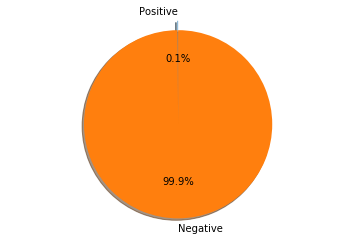

In [49]:
#Creating pie chart of pos and neg tweets
fig1, ax1 = plt.subplots()

ax1.pie(sizes,explode = (0.1, 0), labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

ax1.axis('equal')

plt.show()

In [50]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [52]:
text=[]
for ind in range(len(df)):
    temp = df.loc[ind,'tweet']
    text.append(temp)
    

In [53]:
text_f="".join(text)

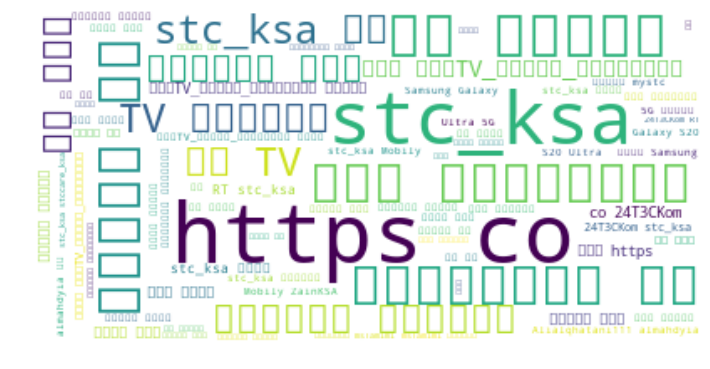

In [55]:
#Creating a world cloud img from text consist of all the tweets in our df
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_f)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [56]:
#Creating a csv file from our data frame
df.to_csv('Final Report On Live Tweets.csv', sep='\t', index=False)